<a href="https://colab.research.google.com/github/shreyasbkgit/ailab/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.3792
Epoch 1000, Loss: 0.0149
Epoch 2000, Loss: 0.0140
Epoch 3000, Loss: 0.0130
Epoch 4000, Loss: 0.0121
Epoch 5000, Loss: 0.0112
Epoch 6000, Loss: 0.0098
Epoch 7000, Loss: 0.0085
Epoch 8000, Loss: 0.0084
Epoch 9000, Loss: 0.0082


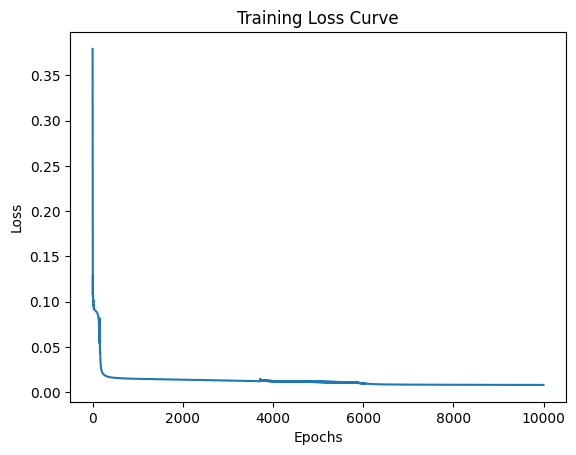

Test Accuracy: 0.97


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
learning_rate = 0.1
epochs = 10000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
B1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
B2 = np.zeros((1, output_size))

# Training loop
losses = []
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X_train, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((A2 - y_train) ** 2)
    losses.append(loss)

    # Backpropagation
    dA2 = A2 - y_train
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# Predictions
def predict(X):
    Z1 = np.dot(X, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)
    return np.argmax(A2, axis=1)

# Evaluate model
predictions = predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Test Accuracy: {accuracy:.2f}")
